# Association rule on Books Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import transactionencoder

In [9]:
df=pd.read_csv(r"D:\Data Science\Assignments\Assignment #9 Association Rule\book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Preprocessing

In [10]:
df2=pd.get_dummies(df)
min(df.mean())

0.037

# Apriori

In [11]:
frequent1 = apriori(df2,min_support =0.16,use_colnames=True)
frequent1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [12]:
frequent2 = apriori(df2,min_support = 0.2,use_colnames=True)
frequent2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [13]:
rules1 = association_rules(frequent1,metric="confidence",min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


In [14]:
rules2 = association_rules(frequent2,metric="confidence",min_threshold=0.1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [15]:
result1=rules1.sort_values('lift',ascending=False)
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
16,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
17,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
14,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
15,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750


In [16]:
result2=rules2.sort_values('lift',ascending=False)
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [17]:
result1= pd.DataFrame(rules1[rules1.lift>1])
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


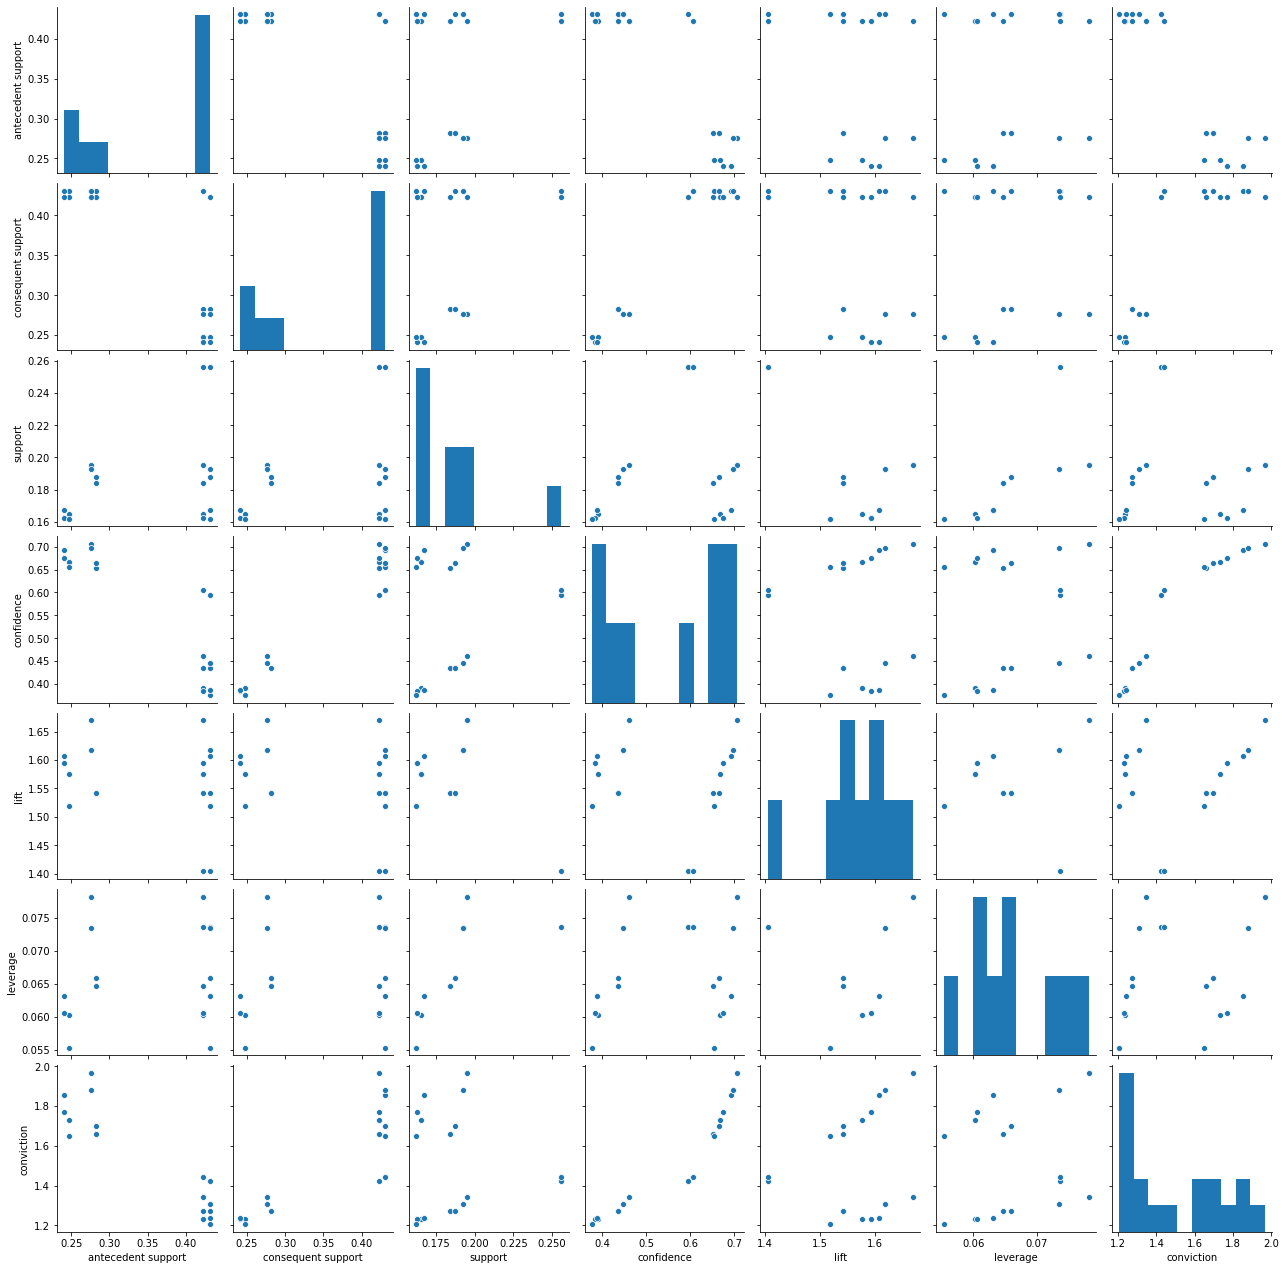

In [18]:
import seaborn as sns
sns.pairplot(result1)


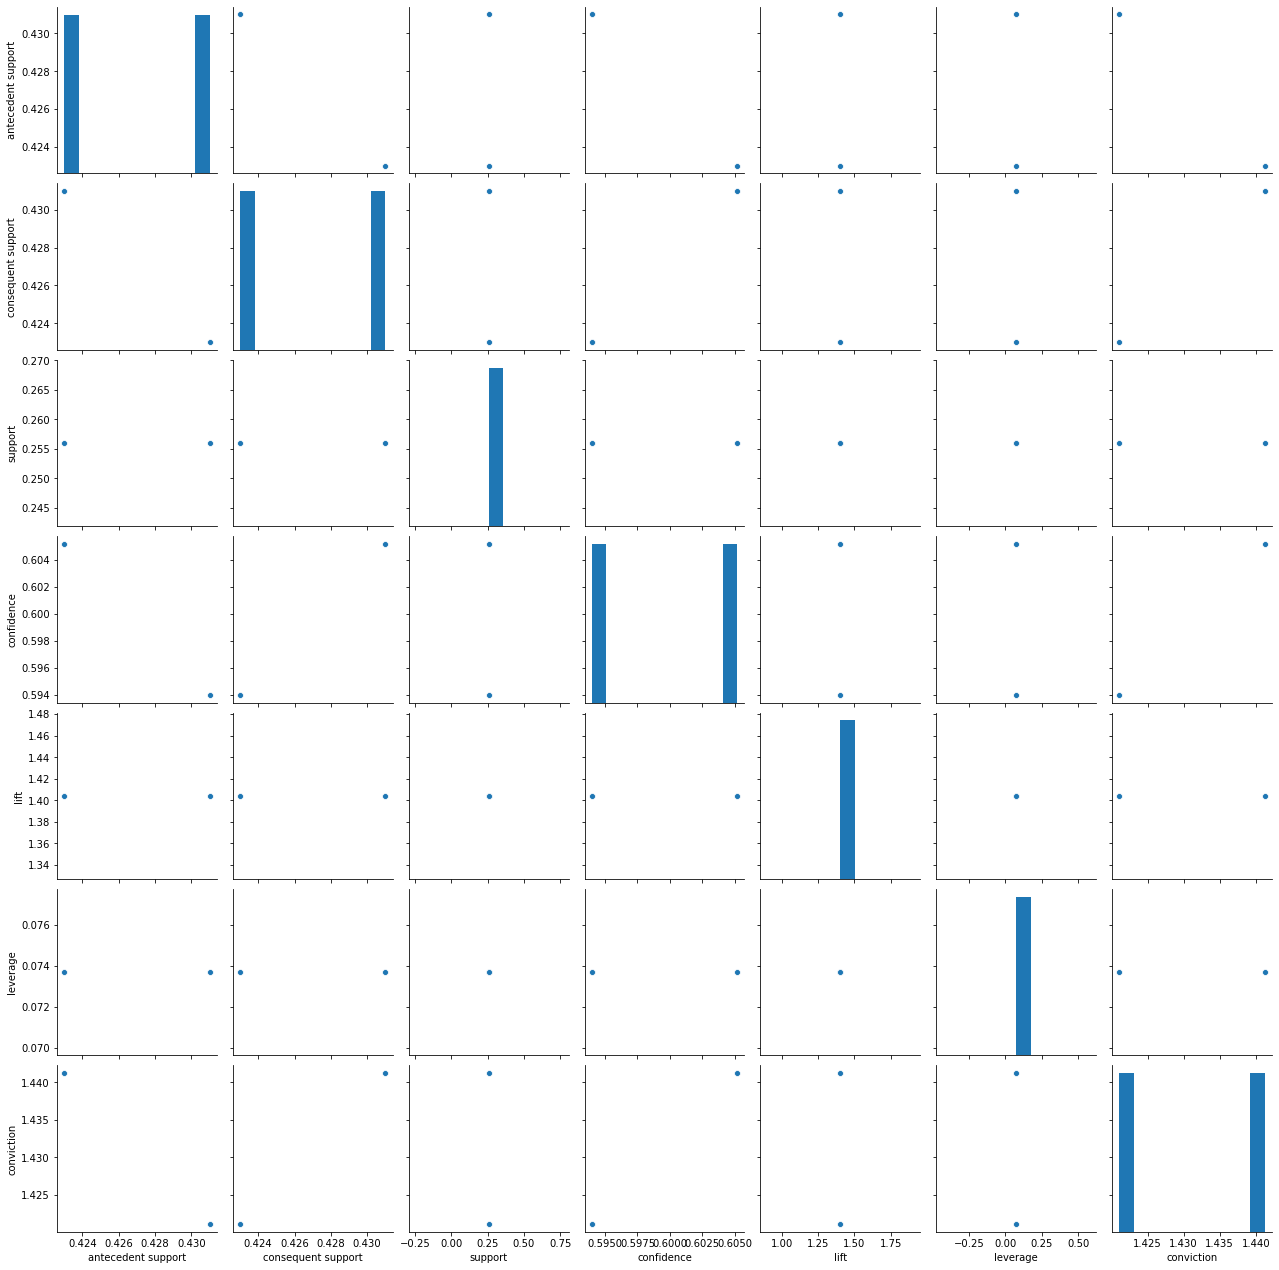

In [19]:
sns.pairplot(result2)

In [20]:
result2= pd.DataFrame(rules2[rules2.lift>1])
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [21]:
result1.to_csv('boooks.csv')
viz=pd.read_csv(r"D:\Data Science\Assignments\Assignment #9 Association Rule\book.csv")
viz

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


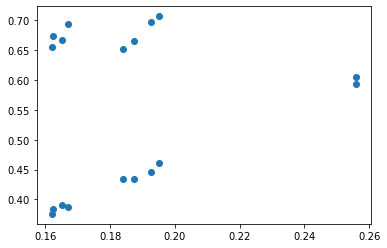

In [22]:
plt.scatter(result1.support,result1.confidence)

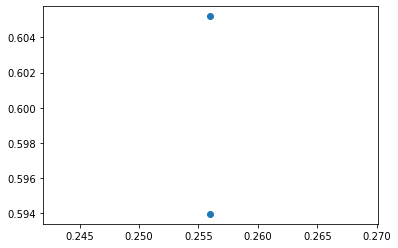

In [23]:
plt.scatter(result2.support,result2.confidence)

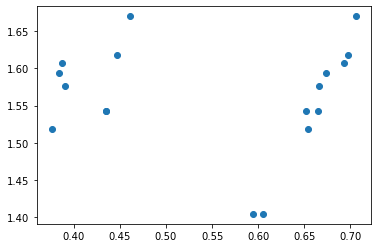

In [24]:

plt.scatter(result1.confidence,result1.lift)

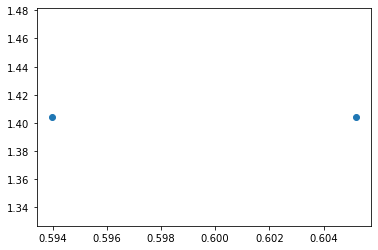

In [25]:
plt.scatter(result2.confidence,result2.lift)


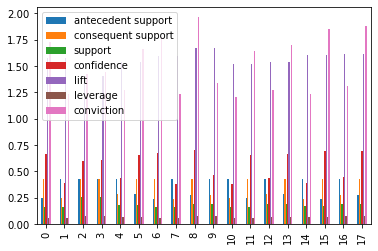

In [26]:
result1.plot(kind="bar")

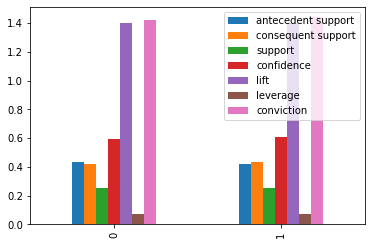

In [27]:
result2.plot(kind='bar')

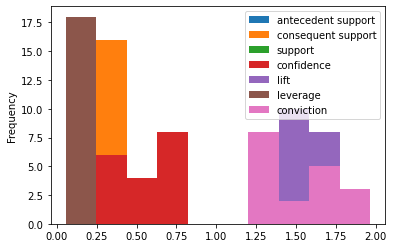

In [28]:
result1.plot(kind='hist')

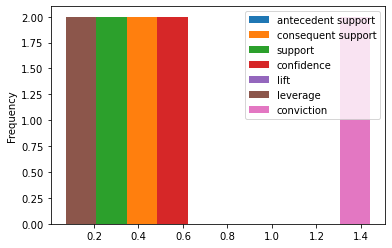

In [29]:
result2.plot(kind='hist')

In [ ]:
from pyvis import network as net
import networkx as nx

In [ ]:
g = net.Network(notebook='True')
nxg = nx.complete_graph(19)
g.from_nx(nxg)
g.show('fresult1.html')

In [ ]:
g= net.Network(notebook=True)
nxg= nx.complete_graph(2)
g.from_nx(nxg)
g.show("result2.html")

# Association rule on Movie data

In [40]:
data=pd.read_csv(r"D:\Data Science\Assignments\Assignment #9 Association Rule\my_movies.csv")
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [41]:
data2 = pd.get_dummies(data)
min(data.mean())

0.1

In [42]:
frequent1 = apriori(data2,min_support=0.6,use_colnames=True)
frequent1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Gladiator, Patriot)"
6,0.6,"(V1_Gladiator, Gladiator)"
7,0.6,"(Gladiator, V2_Patriot)"
8,0.6,"(V1_Gladiator, Patriot)"
9,0.6,"(V2_Patriot, Patriot)"


In [43]:
frequent2= apriori(data2,min_support =0.5,use_colnames=True)
frequent2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [44]:
rule1= association_rules(frequent1,metric='confidence',min_threshold=0.)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [45]:
rule2= association_rules(frequent2,metric='confidence',min_threshold=1)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
5,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
6,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
7,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
8,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
9,"(V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [46]:
result1 = rule1.sort_values('lift',ascending=False)
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(Patriot),"(V1_Gladiator, Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
19,"(Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
41,"(V1_Gladiator, V2_Patriot)","(Gladiator, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
22,(V2_Patriot),"(Gladiator, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
23,(Patriot),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
24,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
40,"(V1_Gladiator, Gladiator)","(V2_Patriot, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
26,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
39,"(Gladiator, V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [47]:
result2 = rule2.sort_values('lift',ascending = False)
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,"(V1_Gladiator, Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V1_Gladiator, Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [48]:
fresult1 = pd.DataFrame(result1[result1.lift>1.6])
fresult1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(Patriot),"(V1_Gladiator, Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
19,"(Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
41,"(V1_Gladiator, V2_Patriot)","(Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V2_Patriot),"(Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(Patriot),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
40,"(V1_Gladiator, Gladiator)","(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
39,"(Gladiator, V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [49]:
fresult2 = pd.DataFrame(result2[result2.lift>1.6])
fresult2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,"(V1_Gladiator, Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V1_Gladiator, Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf


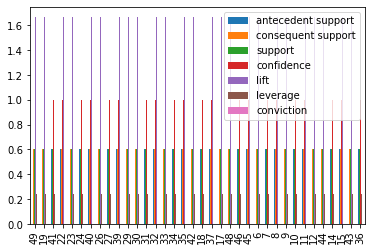

In [50]:
fresult1.plot(kind='bar')

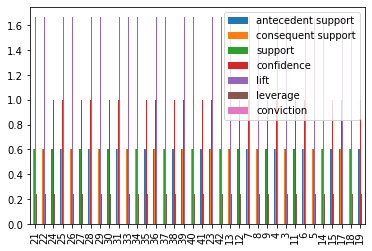

In [51]:
fresult2.plot(kind='bar')

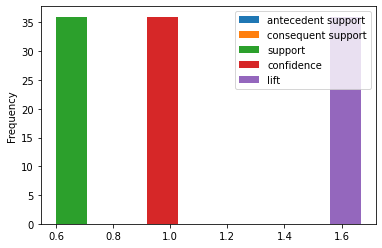

In [52]:
fresult1.iloc[:,0:7].plot(kind='hist')

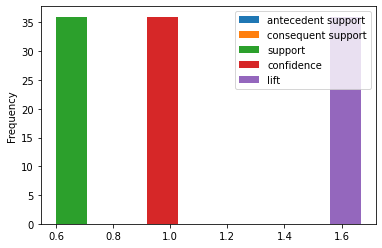

In [53]:
fresult2.iloc[:,1:7].plot(kind='hist')

In [ ]:
from pyvis import network as net
import networkx as nx

g= net.Network(notebook=True)
nxg = nx.complete_graph(16)
g.from_nx(nxg)
g.show('fresult1.html')

In [ ]:

g = net.Network(notebook='True')
nxg = nx.complete_graph(19)
g.from_nx(nxg)
g.show('fresult2.html')